In [1]:
import matplotlib.pyplot as plt
from datetime import datetime as dt
import pandas as pd
import numpy as np
import pickle as pk
import draftAnal as DA
import seaborn as sns

In [2]:
Authors = pk.load( open( "./Data/OUTPUT/Data_09_09.p", "rb" ) )

colliaux
loreto
ubaldi
monechi
bentkowski
pullano


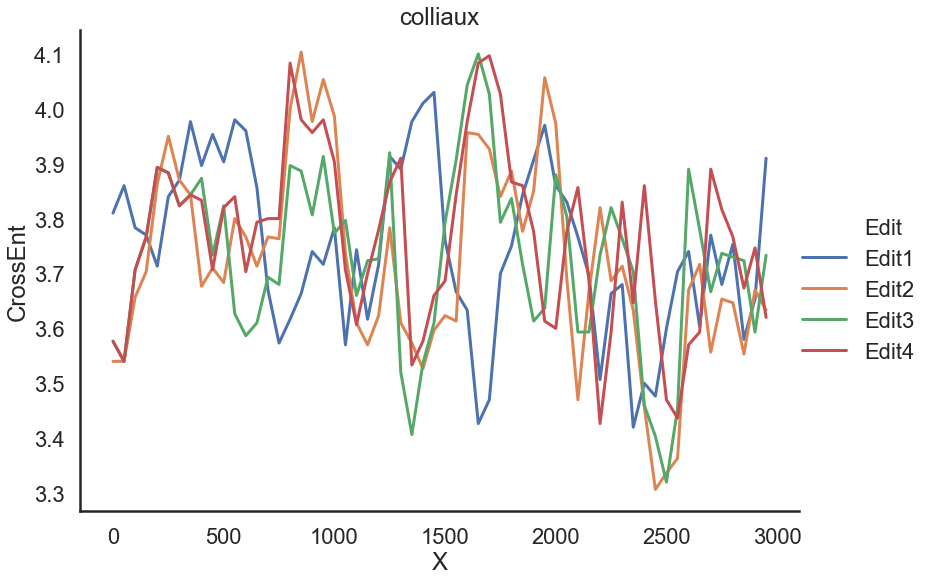

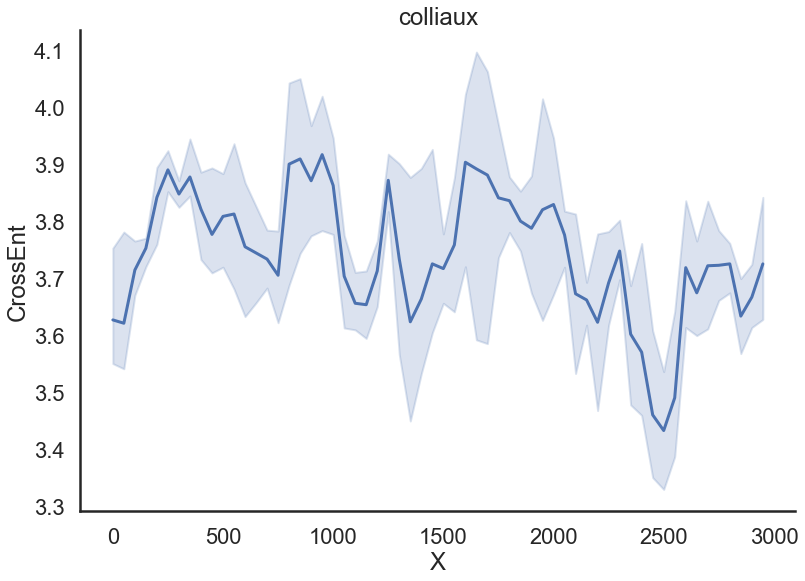

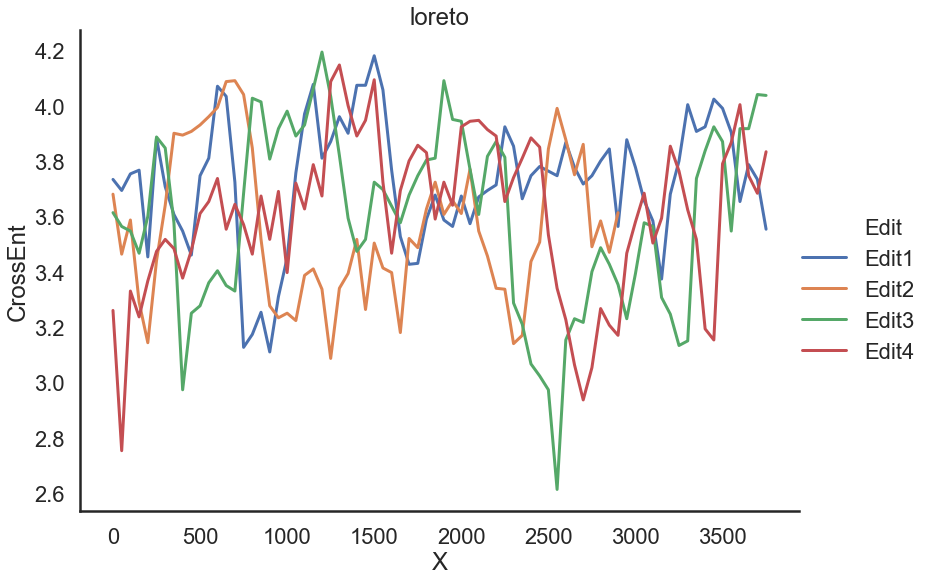

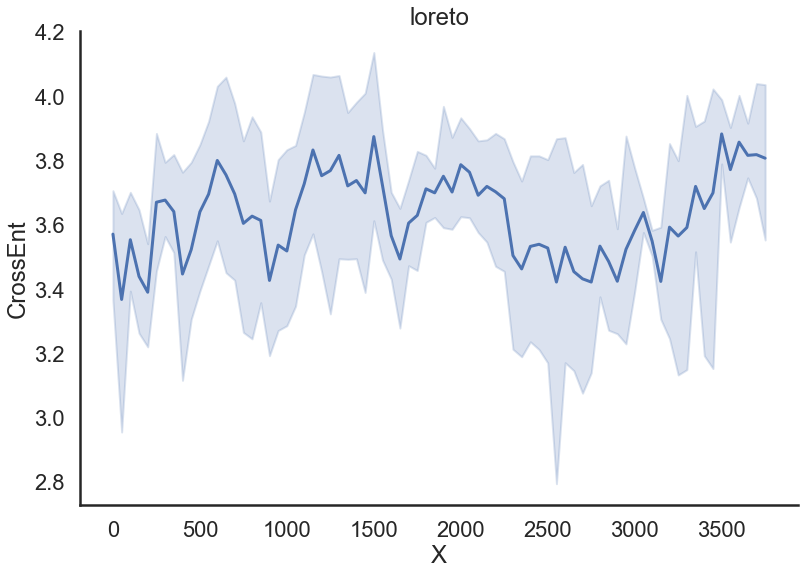

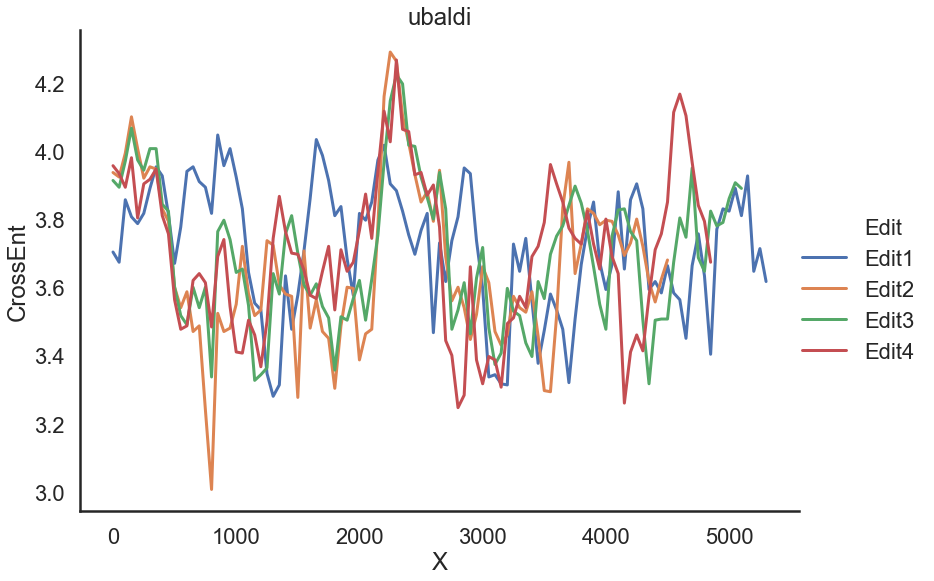

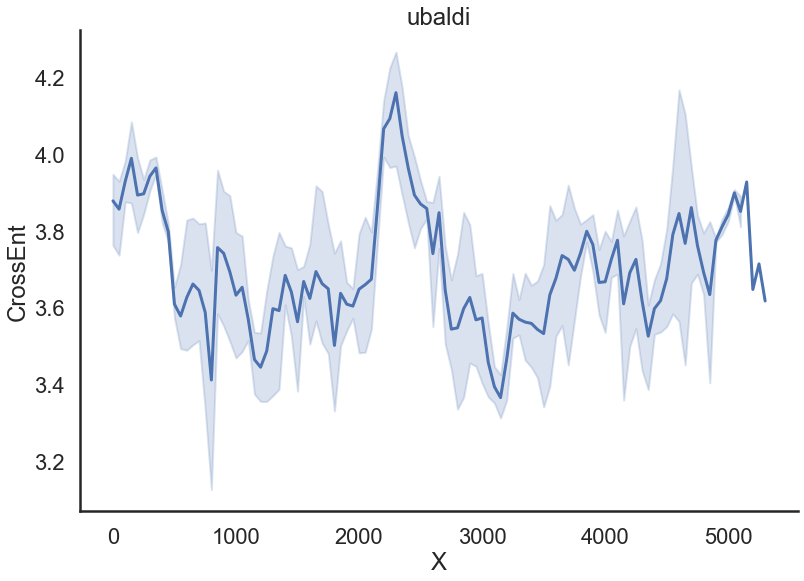

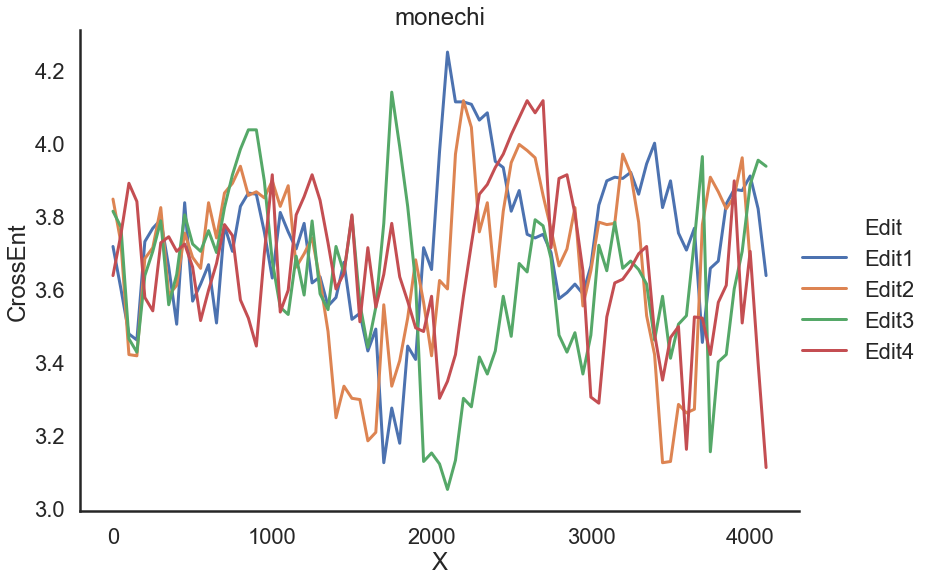

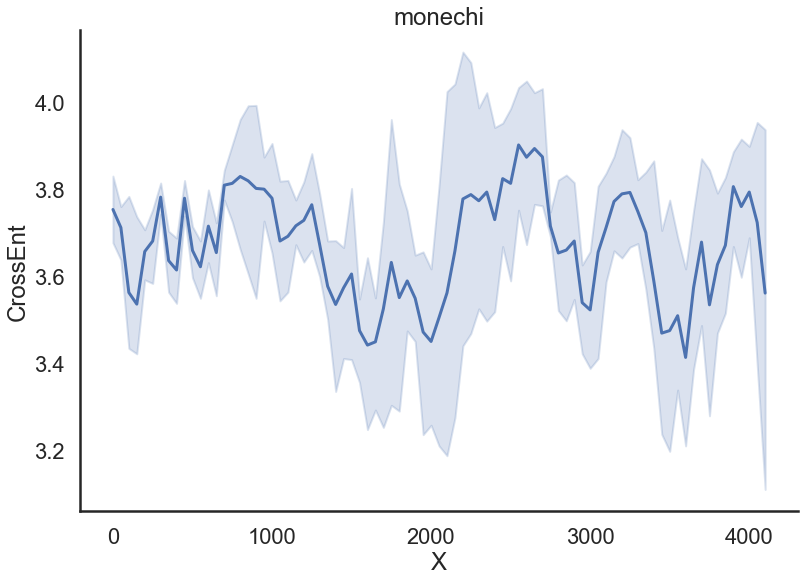

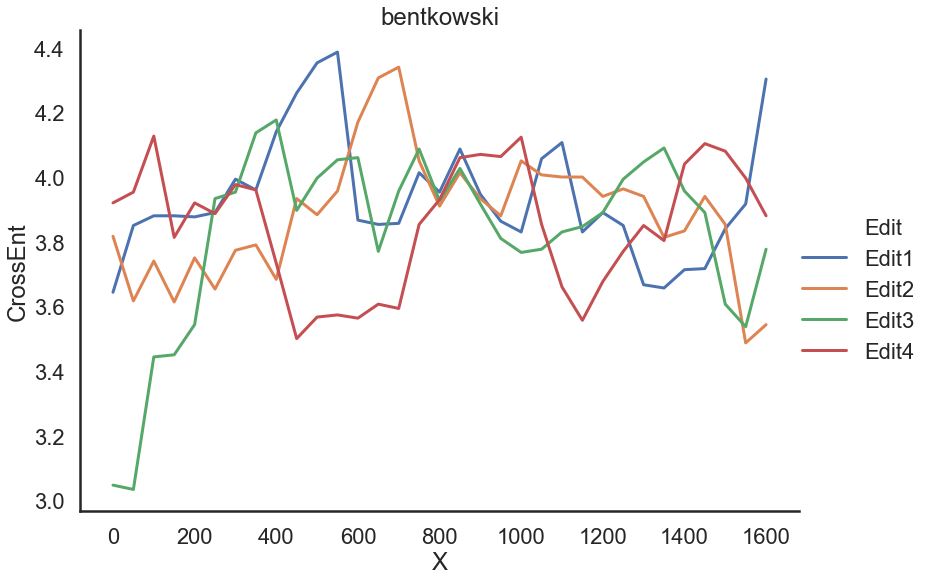

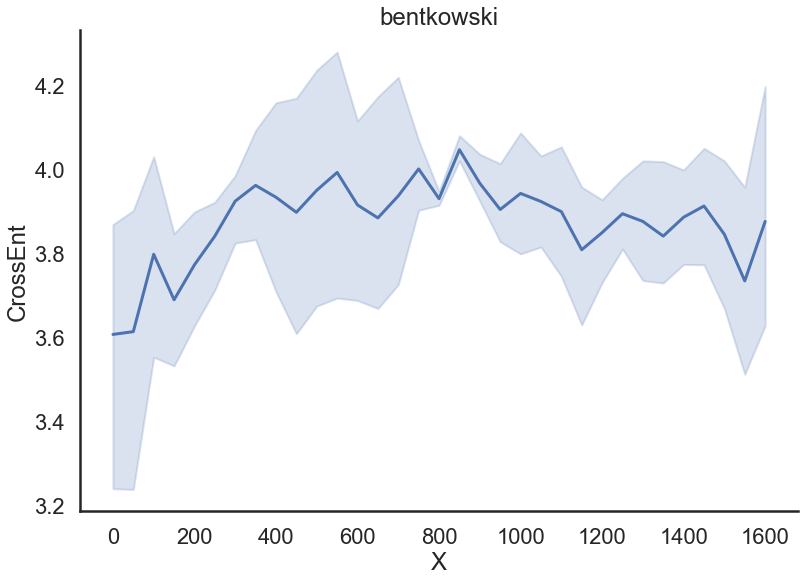

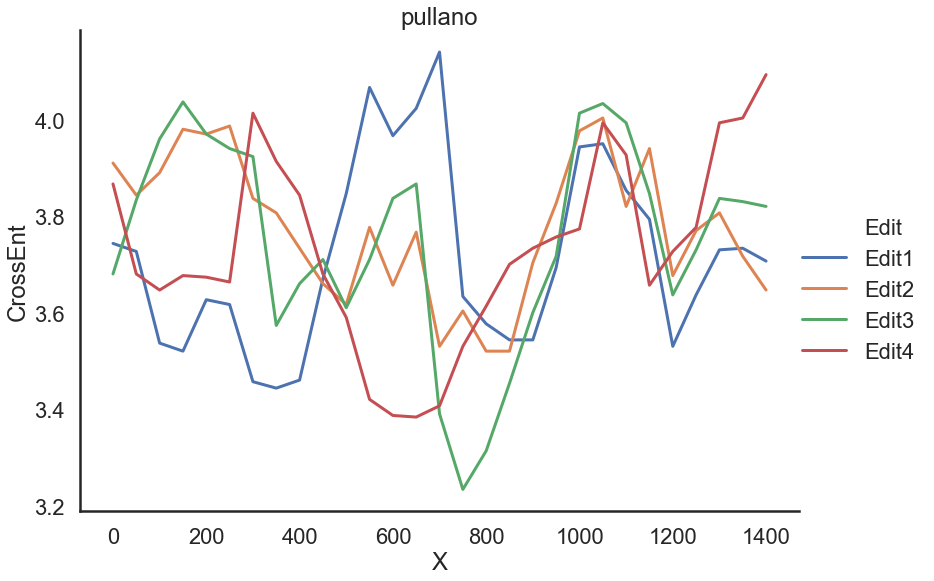

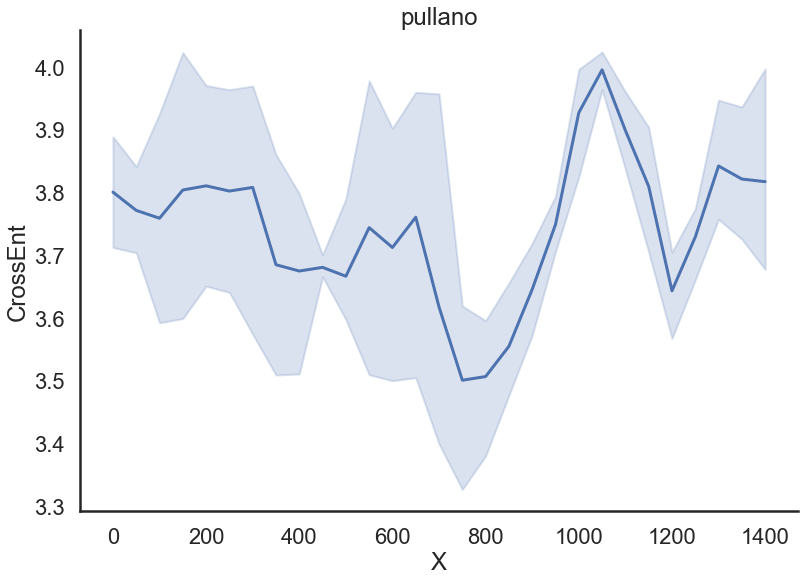

In [4]:
sns.set(rc={'figure.figsize':(16,9)})
sns.set_style("white")
sns.set_context("poster")
for i,author in enumerate(Authors[:6]):
    print(author.name)
    author.FindLastMacro()
    author.drafts[author.Last1].Sliding(C=True)
    author.drafts[author.Last2].Sliding(C=True)
    author.drafts[author.Last3].Sliding(C=True)
    author.drafts[author.Last4].Sliding(C=True)
    df = author.drafts[author.Last1].sliding.data
    df = df.reset_index()
    df['X'] = df['index']*50
    df['Edit1'] =df[1]
    del(df[1])
    df['Edit2'] = author.drafts[author.Last2].sliding.data[1]
    df['Edit3'] = author.drafts[author.Last3].sliding.data[1]
    df['Edit4'] = author.drafts[author.Last4].sliding.data[1]
    df['Author'] = author.name


    df = df.melt(id_vars=['index', 'X', 'Author'], var_name='Edit', value_name='CrossEnt')
    g=sns.relplot( x="X", y='CrossEnt', kind="line", data=df, hue='Edit',
                  height=8.27, aspect=11.7/8.27)
    sns.despine()
    plt.title(author.name)
    
    g=sns.relplot( x="X", y='CrossEnt', kind="line", data=df,
                  height=8.27, aspect=11.7/8.27)
    sns.despine()
    plt.title(author.name)